Project 

Music Festival



Jake Becker (jake.becker@baruchmail.cuny.edu)



 

## Final Report

This data analysis project has evolved tremendously over the semester. What started with a web scrape that primarily focused on gathering metrics (location, date, time) for music festival around the world; quickly changed once the COVID-19 pandemic emerged, altering the landscape of festivals through cancellation and postponement. This factor created a new dynamic in thisanalysis, which focused on festival statuses then analyzing those statuses in relation to Covid-19. 

In [3]:
import requests  # Webscrapping
from bs4 import BeautifulSoup as BS # Webscrapping
import re # Data Organization
from datetime import date # Data Organization
import numpy as np # Data Organization
import pandas as pd # Data Structure / Analysis
from sklearn.linear_model import LinearRegression # Data Analysis
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Data Visualization

# Part 1 (Webscrapping)

In [1]:
import requests  # Webscrapping
from bs4 import BeautifulSoup as BS # Webscrapping
import re # Data Organization
from datetime import date # Data Organization
import numpy as np # Data Organization
import pandas as pd # Data Structure / Analysis
from sklearn.linear_model import LinearRegression # Data Analysis
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Data Visualization

ModuleNotFoundError: No module named 'plotly'

In [2]:
'''Import packages used for Project'''

import requests  # Webscrapping
from bs4 import BeautifulSoup as BS # Webscrapping
import re # Data Organization
from datetime import date # Data Organization
import numpy as np # Data Organization
import pandas as pd # Data Structure / Analysis
from sklearn.linear_model import LinearRegression # Data Analysis
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Data Visualization


'''Webscrapping Jambase.com for Festival Data'''

Festival_Data = [] # List that will contain webscrapped data

for i in range(1,44): # Using for loop to scrap multiple web pages on Jambase.com
    response = requests.get("https://www.jambase.com/festivals/page/"+str(i), headers={'User-Agent': 'Mozilla/5.0'})
    html = BS(response.text, 'html.parser')
    Festival_flair = html.find_all('li', class_='festival')
    for festival in Festival_flair:                            # Using For loop to scrap elements from each web page
        location = []                                          # List that will contain elements from each festival posting on web page
        locations = festival.find('div',class_='h6 flair').text # Find Location of Festival (City, State/Country)
        location_split = locations.split(',')                   # Split Location City and State/Country by comma
        strip_space = location_split[1].lstrip()                # Remove Space from split
        location.append(location_split[0])                      # Append city location to list
        location.append(strip_space)                            # Append country / state to list
        
        '''Creating new element of list to classify region of Festival (World or Domestic)'''
        
        if len(location_split[1]) > 3:  #Using If/Elif function to classify by character length
            location.append('World')
        elif len(location_split[1]) <= 3:
            location.append('USA')
            
            
        '''Scrapping Festival Date From Website'''  
        
        dates_raw = festival.find('div', class_='h6 flair flair-webcast').text
        
        
        '''Formatting Date using Regex'''
        
        date_range = re.sub('^(.*• )',"", dates_raw)  #Delete # of days when importing (before bullet point, •)
        b = re.sub(' -.*?, ', '-', date_range).replace(',', '').replace(' ', '-') 
        #convert range into one day, remove , if single day, put into mon-dd-yyyy form
        location.append(b) #Append clean date
        
        '''Scrapping Festival Name Title and Splitting Festival Status from Scrape'''
        
        names = festival.find('span').text.strip()
        status = names.split('[') #split Festival title from status
        fest_name = status[0].rstrip(' ') 
        location.append(fest_name) #Append clean festival
        
        '''Creating new status element to festival_data list'''
        
        if status[0] != status[-1]:        #Use If statement to Append Status if there is one (***No Status if festival is Scheduled***)
            stripped = status[-1].rstrip(']')  
            location.append(stripped)
        else:                             #Use Else statement to append "SCHEDULED" for data with no status indication
            status[-1] = 'SCHEDULED'
            location.append(status[-1])
        Festival_Data.append(location)


'''Convert Festival Data List to Numpy Array'''

festival_array = np.array(Festival_Data)
print('''Contains each festival data element in festival data list.''')
print('''Each festival data list has been put into an array of all festival data lists''')
festival_array

Contains each festival data element in festival data list.
Each festival data list has been put into an array of all festival data lists


array([['Pittsboro', 'NC', 'USA', 'May-7-2020',
        'Shakori Hills Grassroots Festival', 'CANCELED'],
       ['Ochlocknee', 'GA', 'USA', 'May-7-2020',
        'Great Southern Music Festival', 'CANCELED'],
       ['Milwaukee', 'WI', 'USA', 'May-7-2020', 'Milwaukee Psych Fest',
        'POSTPONED'],
       ...,
       ['Cannes', 'France', 'World', 'Aug-6-2021',
        'La Plages Electroniques', 'SCHEDULED'],
       ['Henley-on-Thames', 'United Kingdom', 'World', 'Aug-20-2021',
        'Rewind Festival: South', 'RESCHEDULED'],
       ['Port Townsend', 'WA', 'USA', 'Aug-27-2021', 'THING',
        'SCHEDULED']], dtype='<U56')

# Part 2 (Data Frame Structure - Pandas)

In [9]:
'''Convery NP.Array into Pandas DataFrame'''

dataset = pd.DataFrame({'Festival': festival_array[:, 4], 'Status': festival_array[:,5],        #Using index to map each data array element to Dataframe Column
                        'City': festival_array[:,0],'State / Country': festival_array[:,1],
                        'Region': festival_array[:,2],'Date': festival_array[:,3]})   

'''Creating Dictionary of US States and Canadian Provinces'''

 # This Dictionary will be used to convert acronyms in DataFrame to full name

states_canada = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California','CO': 'Colorado','CT': 'Connecticut',
        'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam','HI': 'Hawaii',
        'IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana',
        'MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana',
        'NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire',
        'NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon',
        'PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee',
        'TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont',
        'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming','BC':'British Columbia', 'AB': 'Alberta', 'MB' : 'Manitoba', 'NB' : 'New Brunswick', 'NL' : 'Newfoundland',
                   'NS': 'Nova Scotia', 'NT': 'Northwest Territories', 'NT': 'nunavut', 'ON': 'Ontario', 'PE': 'Prince Edward Island',
                   'QC' : 'Quebec', 'SK': 'Saskatchewan', 'YT': 'Yukon'}

'''Creating Region lists with countries as elements'''

# These lists will be used to create Region column in DataFrame

asia = ['Afghanistan', 'Bahrain', 'United Arab Emirates','China','Hong Kong','Saudi Arabia','South Korea',
        'Turkey', 'Kuwait', 'Qatar', 'Oman','Sultanate of Oman','Lebanon','Malaysia','Mongolia', 'Iraq','Indonesia', 
        'Yemen', 'Pakistan', 'Lebanon', 'Philippines', 'Thailand','Taiwan','Singapore','Jordan', 'Japan','Russia']

europe = ['Albania', 'Ireland','Slovak Republic','Czech Republic','Czechia','Cyprus','Belgium','Malta','Germany',
          'Spain', 'France', 'Italy', 'Netherlands', 'Norway', 'Sweden','Czech Republic', 'Finland',
      'Denmark', 'Czech Republic', 'Switzerland', 'United Kingdom', 'UK&I', 'Poland', 'Greece','Austria',
      'Bulgaria', 'Hungary', 'Luxembourg', 'Romania' , 'Slovakia', 'Estonia', 'Slovenia','Portugal','Ukraine',
      'Croatia', 'Lithuania', 'Latvia','Serbia', 'Estonia', 'ME', 'Iceland']

africa = ['Egypt', 'Swaziland', 'Morocco', 'Tunisia','Mozambique','South Africa', 'ZA', 'Kenya','Uganda','Gambia',
          'Ghana','Nigeria']

north_america = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba',
                 'Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica',
                 'Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines',
                 'Trinidad and Tobago','Nova Scotia', 'Northwest Territories', 'nunavut','Ontario','Price Edward Island',
                'Quebec','Saskatchewan','Yukon','British Columbia','Alberta','Manitoba','New Brunswick','Newfoundland',
                'Nova Scotia','Northwest Territories','Nunavut', 'Ontario','Prince Edward Island','Quebec','Saskatchewan','Yukon']

south_america = ['Argentina','Aruba','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru',
                 'Suriname','Uruguay','Venezuela']

oceania = ['Australia','Australian Capital Territory','New Zealand','New South Wales', 'Victoria','Queensland',
           'Northern Territory','South Australia', 'Tasmania', 'Western Australia']

'''Create USA Region List with State Elements'''

usa =  ['Alaska', 'Alabama','Arkansas','American Samoa','Arizona','California','Colorado','Connecticut',
        'District of Columbia','Delaware','Florida','Georgia','Guam','Hawaii','Iowa','Idaho','Illinois',
        'Indiana','Kansas','Kentucky','Louisiana','Massachusetts','Maryland','Maine','Michigan','Minnesota',
        'Missouri','Northern Mariana Islands','Mississippi','Montana','National','North Carolina','North Dakota',
        'Nebraska','New Hampshire','New Jersey','New Mexico','Nevada','New York','Ohio','Oklahoma','Oregon',
         'Pennsylvania','Puerto Rico','Rhode Island','South Carolina','South Dakota','Tennessee',
        'Texas','Utah','Virginia','Virgin Islands','Vermont','Washington','Wisconsin','West Virginia','Wyoming']

'''Create Dictionary to reformat Statuses for Dataframe'''

# Edit Name of Status Values

status_update ={'SCHEDULED':'SCHEDULED','POSTPONED':'POSTPONED','CANCELED':'CANCELLED',
                'RESCHEDULED':'RESCHEDULED','NL':'RESCHEDULED'}

'''Convert Acronymn in Dataframe State / Country column to full name'''

dataset['State / Country'].replace(states_canada, inplace = True) # Replacing acronym values in [State/Country] Column
dataset['Status'].replace(status_update, inplace = True)


'''Create function to return the region of the country'''

def GetConti(country):
    if country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in africa:
        return "Africa"
    elif country in north_america:
        return "North America"
    elif country in south_america:
        return "South America"
    elif country in oceania:
        return "Oceania"
    elif country in usa:
        return 'USA'

'''Add Region of Country to DataFrame Using Country Function'''

dataset['Region'] = dataset['State / Country'].apply(lambda x: GetConti(x))

''' Add Month Column to DataFrame using Date Column'''

dataset['Month'] = pd.to_datetime(dataset['Date'])
month = dataset['Month'].dt.month_name().str.slice(stop=3) #converts full month name to first 3 characters of month
dataset['Month'] = month

'''Add Day of Week Column to DataFrame using value im Date Column'''

dataset['Day'] = pd.to_datetime(dataset['Date'])
day = dataset['Day'].dt.day_name()
dataset['Day'] = day

'''Add Year Column to DataFrame using value im Date Column'''

dataset['Year'] = pd.to_datetime(dataset['Date'])
year = dataset['Year'].dt.year
dataset['Year'] = year


'''Merge Festival Dataset with COVID-19 Dataset'''

dataset2 = pd.read_csv('/Users/jakebecker/OneDrive/School/Semester/Spring 2020/CIS 3120/Project/COUNTRY_DATA.csv') # Read Covid-19 Dataset
dataset2.columns = ['State / Country', 'Date of Covid-19 Cases', 'Confirmed Covid-19 Cases (State / Country)'] # Create Columns for Covid-19 DataFrame
aggregation_functions = {'Confirmed Covid-19 Cases (State / Country)': 'sum', 'Date of Covid-19 Cases': 'first'} # Create Aggregation Dictionary to Aggregate Counties into States and Provinces into Countries
dataset3 = dataset2.groupby(dataset2['State / Country']).aggregate(aggregation_functions) # Apply aggregate dictionary to State / Country Column of Covid-19 Dataset
Festival_Covid_Dataset = pd.merge(dataset, dataset3, how="left", on="State / Country") #Merge Festival Dataset with Covid-19 Dataset using State / Country Column to Map
Festival_Covid_Dataset


,Festival,Status,City,State / Country,Region,Date,Month,Day,Year,Confirmed Covid-19 Cases (State / Country),Date of Covid-19 Cases
0,Shakori Hills Grassroots Festival,CANCELLED,Pittsboro,North Carolina,USA,May-7-2020,May,Thursday,2020,4570,4/12/20
1,Great Southern Music Festival,CANCELLED,Ochlocknee,Georgia,USA,May-7-2020,May,Thursday,2020,12709,4/12/20
2,Milwaukee Psych Fest,POSTPONED,Milwaukee,Wisconsin,USA,May-7-2020,May,Thursday,2020,3341,4/12/20
3,Welcome To Rockville,CANCELLED,Daytona Beach,Florida,USA,May-8-2020,May,Friday,2020,19895,4/12/20
4,Homecoming,CANCELLED,Cincinnati,Ohio,USA,May-8-2020,May,Friday,2020,6604,4/12/20
5,Shaky Boots,CANCELLED,Atlanta,Georgia,USA,May-8-2020,May,Friday,2020,12709,4/12/20
6,Pitchfork Music Festival Berlin,CANCELLED,Berlin,Germany,Europe,May-8-2020,May,Friday,2020,127854,4/12/20
7,93X Twin City Takeover,POSTPONED,Minneapolis,Minnesota,USA,May-8-2020,May,Friday,2020,1621,4/12/20
8,Rochester Lilac Festival,POSTPONED,Rochester,New York,USA,May-8-2020,May,Friday,2020,189033,4/12/20
9,SunLion Orlando,POSTPONED,Orlando,Florida,USA,May-8-2020,May,Friday,2020,19895,4/12/20


In [10]:
'''Concatanate prior webscrapping CSV to include data that is no longer available intiating new webscrape'''


dataset_prior = pd.read_csv('/Users/jakebecker/OneDrive/School/Semester/Spring 2020/CIS 3120/Project/Festival_04_22_2020.csv')
finaldf = pd.concat([dataset_prior, Festival_Covid_Dataset]).drop_duplicates() #Combine Current and Old Dataset
finaldf['Date'] =pd.to_datetime(finaldf.Date).dt.strftime('%m-%d-%Y') #Convert Dates to M/D/Y Format 


In [11]:
'''Check to see if there are any null values in DataFrame'''

print(finaldf.isnull().sum().sum())
print(finaldf.isnull().any())
print(finaldf[finaldf.isna().any(axis=1)])


'''Check to see if there are any Duplicates'''

print(finaldf['Festival'].duplicated())
# making a bool series 
bool_series = finaldf["Festival"].duplicated() 
  
# displaying data 
finaldf.head() 
  
# display data 
finaldf[bool_series] 

0
Festival                                      False
Status                                        False
City                                          False
State / Country                               False
Region                                        False
Date                                          False
Month                                         False
Day                                           False
Year                                          False
Confirmed Covid-19 Cases (State / Country)    False
Date of Covid-19 Cases                        False
dtype: bool
Empty DataFrame
Columns: [Festival, Status, City, State / Country, Region, Date, Month, Day, Year, Confirmed Covid-19 Cases (State / Country), Date of Covid-19 Cases]
Index: []
0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False

,Festival,Status,City,State / Country,Region,Date,Month,Day,Year,Confirmed Covid-19 Cases (State / Country),Date of Covid-19 Cases
972,Paradigm Festival,RESCHEDULED,Ascot Vale,Victoria,Oceania,10-03-2020,Oct,Saturday,2020,1268,4/12/20
1029,Lucidity Festival: Regeneration Earth,RESCHEDULED,Santa Barbara,California,USA,11-06-2020,Nov,Friday,2020,22795,4/12/20
1062,Under The Southern Stars Perth,RESCHEDULED,Mount Claremont,Western Australia,Oceania,02-16-2021,Feb,Tuesday,2021,514,4/12/20
1063,Under The Southern Stars Adelaide,RESCHEDULED,Adelaide,South Australia,Oceania,02-19-2021,Feb,Friday,2021,429,4/12/20
1064,Under The Southern Stars Hastings,RESCHEDULED,Hastings,Victoria,Oceania,02-20-2021,Feb,Saturday,2021,1268,4/12/20
1065,Under The Southern Stars Yarrawonga,RESCHEDULED,Yarrawonga,Victoria,Oceania,02-21-2021,Feb,Sunday,2021,1268,4/12/20
1072,BUKU Music + Art Project,SCHEDULED,New Orleans,Louisiana,USA,03-19-2021,Mar,Friday,2021,20595,4/12/20
1075,New Orleans Jazz & Heritage Festival,SCHEDULED,New Orleans,Louisiana,USA,04-22-2021,Apr,Thursday,2021,20595,4/12/20
1077,Fortress Festival,SCHEDULED,Fort Worth,Texas,USA,04-24-2021,Apr,Saturday,2021,13677,4/12/20
1081,Hangout Music Festival,SCHEDULED,Gulf Shores,Alabama,USA,05-21-2021,May,Friday,2021,3563,4/12/20


In [12]:
'''Drop Duplicates from DataFrame'''
finaldf.drop_duplicates(subset='Festival')

,Festival,Status,City,State / Country,Region,Date,Month,Day,Year,Confirmed Covid-19 Cases (State / Country),Date of Covid-19 Cases
0,WonderGrass Presents: Sugar & Strings,CANCELLED,Stratton,Vermont,USA,04-10-2020,Apr,Friday,2020,727,4/12/20
1,Lucidity Festival: Regeneration Earth,POSTPONED,Santa Barbara,California,USA,04-10-2020,Apr,Friday,2020,22795,4/12/20
2,Sunshine 66,CANCELLED,Springfield,Illinois,USA,04-10-2020,Apr,Friday,2020,20852,4/12/20
3,Reperkusound #15,CANCELLED,Villeurbanne,France,Europe,04-10-2020,Apr,Friday,2020,133670,4/12/20
4,UK Garage Fest,POSTPONED,London,United Kingdom,Europe,04-10-2020,Apr,Friday,2020,85206,4/12/20
5,S2O Songkran Music Festival,CANCELLED,Tokyo,Japan,Asia,04-11-2020,Apr,Saturday,2020,6748,4/12/20
6,SIAM Songkran Music Festival,CANCELLED,Bangkok,Thailand,Asia,04-11-2020,Apr,Saturday,2020,2169,4/5/20
7,Free Your Mind Easter Weekender,POSTPONED,The Hague,Netherlands,Europe,04-11-2020,Apr,Saturday,2020,25743,4/12/20
8,DGTL Amsterdam,CANCELLED,Amsterdam,Netherlands,Europe,04-11-2020,Apr,Saturday,2020,25743,4/12/20
9,Desert Daze: RE+UNION,POSTPONED,Pioneertown,California,USA,04-11-2020,Apr,Saturday,2020,22795,4/12/20


In [13]:
'''Create CSV of New DataFrame'''

csv = finaldf.to_csv('Festival_05_07_2020.csv')

# Part 3 (Analysis and Visualization)


In [14]:
'''Format Festival Count by Region for pie chart visualization'''

region_df= finaldf.loc[(finaldf['Year'] == 2020)].pivot_table('Festival', index='Region',
                                 aggfunc='count', fill_value=0).reset_index().rename_axis(None, axis=1)
region_df =region_df.sort_values('Festival',ascending=False)
region_df

,Region,Festival
2,Europe,987
6,USA,968
3,North America,102
5,South America,77
4,Oceania,54
0,Africa,47
1,Asia,43


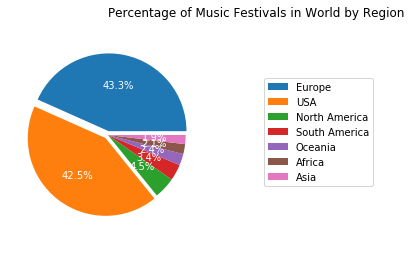

In [15]:
'''Festivals by Region Pie Chart'''

#Utilizing Matplotlib

title = plt.title('Percentage of Music Festivals in World by Region')
title.set_ha("left")
plt.gca().axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
explode = (.05, .05, 0, 0,0,0,0) #Used to emphasize US and Europe Region
pie = plt.pie(region_df['Festival'], startangle=0,explode=explode,autopct='%1.1f%%',textprops=dict(color="w"))
labels=region_df['Region']
plt.legend(pie[0],labels, bbox_to_anchor=(.85,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)


In [16]:
'''Converting 2020 USA Festival Data into Format for Chloropeth Map Visualization'''

usa_state= finaldf.loc[(finaldf['Year'] == 2020) & (finaldf['Region'] == 'USA')].pivot_table('Festival', index='State / Country',  #Using .loc to find USA Festival in 2020
                                 aggfunc='count', fill_value=0).reset_index().rename_axis(None, axis=1)
inverted_dict = dict(map(reversed, states_canada.items()))                           #creating inverted dictionary to convert US Name to US acronym
usa_state['State / Country'].replace(inverted_dict, inplace = True)                  #replacing Name with Acronym in order to use Chloropeth Chart
usa_state

,State / Country,Festival
0,AL,8
1,AZ,12
2,AR,16
3,CA,117
4,CO,43
5,CT,9
6,DE,4
7,DC,6
8,FL,62
9,GA,25


In [2]:

'''Utilizing Chloropeth Chart Do Visually Display USA Festival Data by State'''

fig = px.choropleth(usa_state,locationmode="USA-states", locations='State / Country', color='Festival',
                           color_continuous_scale="algae",
                           range_color=(0, 120),
                           scope="usa",
                           labels={'State':'Festivals'})
fig.update_layout(title_text = 'Festivals in USA (2020)')
fig.show()


NameError: name 'usa_state' is not defined

In [15]:
'''Filter Data by 2020 and USA then Group DataFrame by Month and Status - This is to see canceled/postpone trends'''

status_year_month = finaldf.loc[(finaldf['Year'] == 2020) & (finaldf['Region'] == 'USA')].groupby(['Month','Status'],sort=False) #only want to use 2020 because no festivals in 2021 are postponed/canceled
agg_counts = status_year_month.size().unstack().fillna(0) #Fill N/A values with 0 (so we can total)
print('USA')
agg_counts


USA


Status,CANCELLED,POSTPONED,SCHEDULED,RESCHEDULED
Month,,,,
Apr,21.0,7.0,0.0,0.0
May,84.0,28.0,14.0,0.0
Jun,80.0,5.0,67.0,14.0
Jul,24.0,0.0,162.0,4.0
Aug,4.0,2.0,94.0,34.0
Sep,8.0,0.0,118.0,60.0
Oct,0.0,2.0,52.0,50.0
Nov,0.0,0.0,10.0,5.0
Dec,0.0,0.0,0.0,2.0


In [16]:
'''Stack DataFrame to get data ready for visualization'''

agg_counts = agg_counts.stack()
agg_counts.name = 'Total' #ADD TOTAL COLUMN
agg_counts = agg_counts.reset_index()
agg_counts

,Month,Status,Total
0,Apr,CANCELLED,21.0
1,Apr,POSTPONED,7.0
2,Apr,SCHEDULED,0.0
3,Apr,RESCHEDULED,0.0
4,May,CANCELLED,84.0
5,May,POSTPONED,28.0
6,May,SCHEDULED,14.0
7,May,RESCHEDULED,0.0
8,Jun,CANCELLED,80.0
9,Jun,POSTPONED,5.0


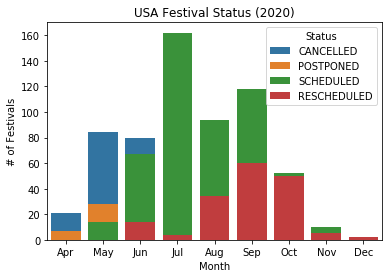

Plot indicates that US Festivals in April and May have been mostly Postponed/Cancelled.
Plot also shows that majority of festivals that have been cancelled in April and May (Increasing in June as well) 
 are being rescheduled to later in year.


In [17]:
'''Create Stacked Bar Chart Showing Festival Status by Month in USA'''

sns.barplot(x='Month', y='Total', hue='Status', dodge=False,  data=agg_counts).set_title('USA Festival Status (2020)')
plt.ylabel('# of Festivals')
plt.show()
print('Plot indicates that US Festivals in April and May have been mostly Postponed/Cancelled.')
print('Plot also shows that majority of festivals that have been cancelled in April and May (Increasing in June as well) \n are being rescheduled to later in year.')

In [18]:
'''Filter Data by 2020 then Group DataFrame by Month and Status - This is to see cancelled/postpone trends'''

status_year_month_INT = finaldf.loc[(finaldf['Year'] == 2020) & (finaldf['Region'] != 'USA')].groupby(['Month','Status'],sort=False) #only want to use 2020 because no festivals in 2021 are postponed/canceled
International = status_year_month_INT.size().unstack().fillna(0) #Fill N/A values with 0 (so we can total)
print('International')
International

International


Status,CANCELLED,POSTPONED,SCHEDULED,RESCHEDULED
Month,,,,
Apr,17.0,16.0,0.0,0.0
May,76.0,16.0,26.0,0.0
Jun,154.0,15.0,72.0,0.0
Jul,117.0,8.0,272.0,2.0
Aug,45.0,18.0,172.0,16.0
Sep,0.0,1.0,33.0,54.0
Oct,0.0,0.0,24.0,31.0
Nov,0.0,0.0,13.0,23.0
Dec,0.0,0.0,13.0,8.0


In [19]:
'''Stack DataFrame to get data ready for visualization'''

International = International.stack()
International.name = 'Total' #ADD TOTAL COLUMN
International = International.reset_index()
International

,Month,Status,Total
0,Apr,CANCELLED,17.0
1,Apr,POSTPONED,16.0
2,Apr,SCHEDULED,0.0
3,Apr,RESCHEDULED,0.0
4,May,CANCELLED,76.0
5,May,POSTPONED,16.0
6,May,SCHEDULED,26.0
7,May,RESCHEDULED,0.0
8,Jun,CANCELLED,154.0
9,Jun,POSTPONED,15.0


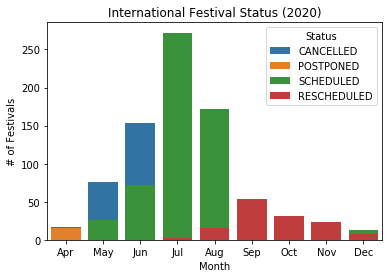

In [20]:
'''International Stacked Bar Chart of Festival Statuses'''
sns.barplot(x='Month', y='Total', hue='Status', dodge=False,  data=International).set_title('International Festival Status (2020)')
plt.ylabel('# of Festivals')
plt.show()

# Analysis 2

In light of the information displayed regarding cancelled/postponed festivals for both the US and International, we decided to examine festival months most impacted by the Covid-19 (April and May) to see if there was a correalation between the cancellations/postponment of festivals and Covid-19 cases.

In [21]:
'''Filter DataFrame to April, May, June (2020)'''
# this is so we can focus our data on the  festival months mostly affected by Covid-19

cancel_festival = finaldf.loc[(finaldf['Year'] == 2020)] # Filter by Year
cancel_festival = cancel_festival.loc[cancel_festival['Month'].isin(['Apr','May'])] # Filter by Month Values
cancel_festival

,Festival,Status,City,State / Country,Region,Date,Month,Day,Year,Confirmed Covid-19 Cases (State / Country),Date of Covid-19 Cases
0,WonderGrass Presents: Sugar & Strings,CANCELLED,Stratton,Vermont,USA,04-10-2020,Apr,Friday,2020,727,4/12/20
1,Lucidity Festival: Regeneration Earth,POSTPONED,Santa Barbara,California,USA,04-10-2020,Apr,Friday,2020,22795,4/12/20
2,Sunshine 66,CANCELLED,Springfield,Illinois,USA,04-10-2020,Apr,Friday,2020,20852,4/12/20
3,Reperkusound #15,CANCELLED,Villeurbanne,France,Europe,04-10-2020,Apr,Friday,2020,133670,4/12/20
4,UK Garage Fest,POSTPONED,London,United Kingdom,Europe,04-10-2020,Apr,Friday,2020,85206,4/12/20
5,S2O Songkran Music Festival,CANCELLED,Tokyo,Japan,Asia,04-11-2020,Apr,Saturday,2020,6748,4/12/20
6,SIAM Songkran Music Festival,CANCELLED,Bangkok,Thailand,Asia,04-11-2020,Apr,Saturday,2020,2169,4/5/20
7,Free Your Mind Easter Weekender,POSTPONED,The Hague,Netherlands,Europe,04-11-2020,Apr,Saturday,2020,25743,4/12/20
8,DGTL Amsterdam,CANCELLED,Amsterdam,Netherlands,Europe,04-11-2020,Apr,Saturday,2020,25743,4/12/20
9,Desert Daze: RE+UNION,POSTPONED,Pioneertown,California,USA,04-11-2020,Apr,Saturday,2020,22795,4/12/20


In [22]:
'''Create Pivot Table of USA Festival Statuses for April, May (2020)''' 

cancel_festival_usa = cancel_festival.loc[(cancel_festival['Region'] == 'USA')].pivot_table('Festival', index='State / Country',
                                columns='Status', aggfunc='count', fill_value=0).reset_index().rename_axis(None, axis=1)


'''Add Total Column to Festival Statuses Pivot Table'''

USA = cancel_festival_usa

USA['Total'] = USA.sum(axis=1) #Sum Values by Row

'''Create Festival Covid Impact Ratio'''

# Covid Impact Ratio will be used for doing a scatter plot between Festival Cancellations/Postpone and Cases of Covid 19

USASUM = USA['CANCELLED'] + USA['POSTPONED']   #Sum values for statuses that are the result of Covid 19

USA['Covid-19 Impact Ratio'] = USASUM.div(USA['Total'].values, axis=0).round(3) #Calculate Ratio

USA.sort_values(by=['Covid-19 Impact Ratio'],ascending=False) # Sort Ratio


,State / Country,CANCELLED,POSTPONED,SCHEDULED,Total,Covid-19 Impact Ratio
27,Wisconsin,0,2,0,2,1.000
11,Minnesota,0,2,0,2,1.000
22,Tennessee,2,2,0,4,1.000
21,South Carolina,3,0,0,3,1.000
20,Pennsylvania,1,0,0,1,1.000
19,Oklahoma,2,0,0,2,1.000
15,New Jersey,2,0,0,2,1.000
1,Arizona,1,1,0,2,1.000
13,Missouri,2,0,0,2,1.000
24,Vermont,1,0,0,1,1.000


In [23]:
'''Format USA Covid Data with Covid Impact Ratio for Scatter Plot'''

covid_scatter_usa = pd.merge(USA[['State / Country','Covid-19 Impact Ratio']], 
                         finaldf[['State / Country','Confirmed Covid-19 Cases (State / Country)']], #merge covid 19 cases column with ratio
                         how="left", on='State / Country')


'''Drop Duplicates from DataFrame'''

covid_scatter_usa = covid_scatter_usa.drop_duplicates(subset='State / Country')

covid_scatter_usa.columns = ['State','Covid-19 Ratio','Covid-19 Cases (State)']
covid_scatter_usa

,State,Covid-19 Ratio,Covid-19 Cases (State)
0,Alabama,0.750,3563
9,Arizona,1.000,3542
21,Arkansas,0.333,1280
37,California,0.875,22795
154,Colorado,1.000,7307
196,Florida,0.933,19895
267,Georgia,0.889,12709
294,Illinois,1.000,20852
327,Louisiana,1.000,20595
344,Maryland,1.000,8225


In [24]:
'''Set up Data for Linear Regression to see the correlation between Covid-19 Ratio and Covid-19 Cases (State)'''

y = covid_scatter_usa['Covid-19 Cases (State)']
x = covid_scatter_usa['Covid-19 Ratio']

'''Calculate R2 between indepedent and dependent variable'''

y_new = y
x_new = x.values.reshape(-1, 1)
model = LinearRegression().fit(x_new, y_new)
(print('This R2 Score indicates an abornmal model that has no logical meaning and may resort from small sample size'))
model.score(x_new, y_new)


This R2 Score indicates an abornmal model that has no logical meaning and may resort from small sample size


2.5672730341597116e-07

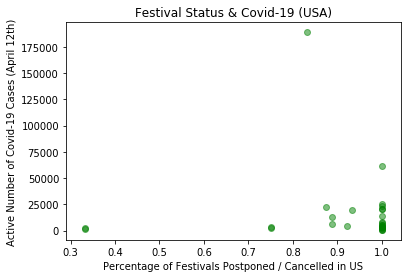

In [25]:
'''Plot Covid-19 Ratio and Covid-19 Cases (State)'''

y = covid_scatter_usa['Covid-19 Cases (State)']
x = covid_scatter_usa['Covid-19 Ratio']

plt.scatter(x, y, c='g', alpha=0.5)
plt.title('Festival Status & Covid-19 (USA)')
plt.xlabel('Percentage of Festivals Postponed / Cancelled in US')
plt.ylabel('Active Number of Covid-19 Cases (April 12th)')
plt.show()

R2 without Outliers
0.0599544266340738


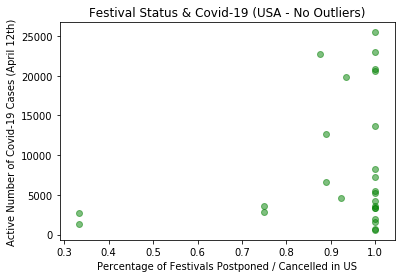

In [26]:
'''Remove Outliers (New York and New Jersey) from Liner Regression Analysis'''

covid_scatter_usa = covid_scatter_usa[(covid_scatter_usa.State != 'New York') & (covid_scatter_usa.State != 'New Jersey')]
y = covid_scatter_usa['Covid-19 Cases (State)']
x = covid_scatter_usa['Covid-19 Ratio']

'''Calculate R2 between indepedent and dependent variable without outliers'''

y_new = y
x_new = x.values.reshape(-1, 1)
model = LinearRegression().fit(x_new, y_new)

print('R2 without Outliers')
print(model.score(x_new, y_new))

plt.scatter(x, y, c='g', alpha=0.5)
plt.title('Festival Status & Covid-19 (USA - No Outliers)')
plt.xlabel('Percentage of Festivals Postponed / Cancelled in US')
plt.ylabel('Active Number of Covid-19 Cases (April 12th)')
plt.show()

In [27]:


'''Create Pivot Table of International Festival Statuses for April and May (2020)''' 

cancel_festival_international = cancel_festival.loc[(cancel_festival['Region'] != 'USA')].pivot_table('Festival', index='State / Country',
                                columns='Status', aggfunc='count', fill_value=0).reset_index().rename_axis(None, axis=1)


'''Add Total Column to Festival Statuses Pivot Table'''

INT = cancel_festival_international

INT['Total'] = INT.sum(axis=1) #Sum Values by Row

'''Create Festival Covid Impact Ratio'''
# Covid Impat Ratio will be used for doing a scatter plot between Festival Cancellations/Postpone and Cases of Covid 19

INTSUM = INT['CANCELLED'] + INT['POSTPONED'] #Sum values for statuses that are the result of Covid 19

INT['Covid-19 Impact Ratio'] = INTSUM.div(INT['Total'].values, axis=0).round(3) #Calculate Ratio

INT.sort_values(by=['Covid-19 Impact Ratio'],ascending=False) # Sort Ratio


,State / Country,CANCELLED,POSTPONED,SCHEDULED,Total,Covid-19 Impact Ratio
0,Albania,2,0,0,2,1.000
15,Mexico,3,1,0,4,1.000
33,Victoria,2,2,0,4,1.000
31,Turkey,0,1,0,1,1.000
30,Thailand,1,0,0,1,1.000
29,Taiwan,1,0,0,1,1.000
28,Switzerland,2,0,0,2,1.000
27,Swaziland,2,0,0,2,1.000
26,Spain,1,1,0,2,1.000
24,South Australia,1,1,0,2,1.000


In [28]:
'''Format International Covid Data with Covid Impact Ratio for Scatter Plot'''

covid_scatter_int = pd.merge(INT[['State / Country','Covid-19 Impact Ratio']], 
                         finaldf[['State / Country','Confirmed Covid-19 Cases (State / Country)']], #merge covid 19 cases column with ratio
                         how="left", on='State / Country')


'''Drop Duplicates from DataFrame'''

covid_scatter_int = covid_scatter_int.drop_duplicates(subset='State / Country')

covid_scatter_int.columns = ['Country','Covid-19 Ratio','Covid-19 Cases (Country)']
covid_scatter_int

,Country,Covid-19 Ratio,Covid-19 Cases (Country)
0,Albania,1.000,446
2,Alberta,1.000,1567
15,Australian Capital Territory,1.000,103
16,Austria,1.000,13945
23,Brazil,0.000,22192
74,Chile,0.000,7213
78,Croatia,0.500,1600
123,Denmark,1.000,6369
132,France,0.818,133670
267,Germany,1.000,127854


In [29]:
'''Set up Data for Linear Regression to see the correlation between Covid-19 Ratio and Covid-19 Cases (International)'''

y_int = covid_scatter_int['Covid-19 Cases (Country)']
x_int = covid_scatter_int['Covid-19 Ratio']

'''Calculate R2 between indepedent and dependent variable'''

y_new = y_int
x_new = x_int.values.reshape(-1, 1)
model = LinearRegression().fit(x_new, y_new)
print('R2 Score')
model.score(x_new, y_new) 

R2 Score


0.006491808281525957

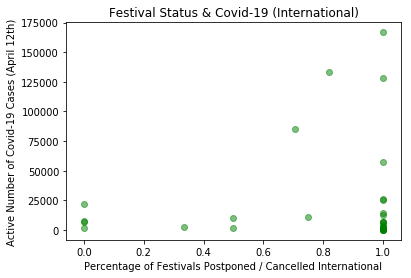

In [30]:
'''Plot Covid-19 Ratio and Covid-19 Cases (Country)'''

y = covid_scatter_int['Covid-19 Cases (Country)']
x = covid_scatter_int['Covid-19 Ratio']

plt.scatter(x, y, c='g', alpha=0.5)
plt.title('Festival Status & Covid-19 (International)')
plt.xlabel('Percentage of Festivals Postponed / Cancelled International')
plt.ylabel('Active Number of Covid-19 Cases (April 12th)')
plt.show()

# REFERENCES

Webscrapping Data:
<br>
https://www.jambase.com/festivals
<br>
Covid 19 Data:
<br>
https://www.kaggle.com/imdevskp/corona-virus-report
<br>
https://github.com/CSSEGISandData/COVID-19
<br>

Packages/Modules:
<br>
Beautiful Soup - https://www.crummy.com/software/BeautifulSoup/bs4/doc/
<br>
Numpy - https://docs.scipy.org/doc/numpy/user/
<br>
Pandas - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
<br>
DateTime - https://docs.python.org/2/library/datetime.html
<br>
Regex - https://docs.python.org/3/library/re.html
<br>
Seaborn - https://seaborn.pydata.org/
<br>
Matplotlib - https://matplotlib.org/
<br>
Plotly - https://plotly.com/